<a href="https://colab.research.google.com/github/aliraee/APSARA-python/blob/main/APSARA_shceduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:

class Switch:
    def __init__(self, ports):
        self.ports = ports
        self.queues = [[] for _ in range(ports)]  # Initialize empty queues for each port

    def put_in_queue(self, in_port, out_port):
        self.queues[in_port].append(out_port)

    def process_frame(self):
        # Perform matching and process packets
        matched = set()
        for in_port in range(self.ports):
            if self.queues[in_port]:
                out_port = self.queues[in_port].pop(0)  # Remove the first packet in the queue
                if out_port not in matched:  # Ensure one-to-one matching
                    matched.add(out_port)
        return len(matched)  # Return the number of successfully matched packets

    def print_status(self):
        for i, queue in enumerate(self.queues):
            print(f"Port {i}: {queue}")


# Parameters

In [15]:
test_no = 131003  # Number of frames to simulate
port_range = range(4, 9)  # Switch ports from 4 to 8
load_range = range(0, 101, 10)  # Load from 0% to 100% in steps of 10%


# Simulation

In [12]:
def simulate_switch(ports, load, test_no):
    s = Switch(ports)
    packet_no = 0
    matched_packets_total = 0

    for frame in range(test_no):
        for in_port in range(ports):
            if random.randint(0, 99) < load:
                out_port = random.randint(0, ports - 1)
                s.put_in_queue(in_port, out_port)
                packet_no += 1

        matched_packets = s.process_frame()
        matched_packets_total += matched_packets

    # Calculate utilization (matched packets / total packets)
    utilization = (matched_packets_total / packet_no) * 100 if packet_no > 0 else 0
    return utilization


# Main function to run simulations and plot results

In [16]:
def main():
    # Store results for plotting
    results = np.zeros((len(port_range), len(load_range)))

    for i, ports in enumerate(port_range):
        for j, load in enumerate(load_range):
            utilization = simulate_switch(ports, load, test_no)
            results[i, j] = utilization
            print(f"Ports: {ports}, Load: {load}%, Utilization: {utilization:.2f}%")

    # Create heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        results,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        xticklabels=[f"{load}%" for load in load_range],
        yticklabels=[f"{ports} Ports" for ports in port_range],
    )
    plt.xlabel("Load (%)")
    plt.ylabel("Number of Ports")
    plt.title("Port Utilization Heatmap (Utilization % vs. Load and Ports)")
    plt.show()


Ports: 4, Load: 0%, Throughput: 0.00%
Ports: 4, Load: 10%, Throughput: 96.29%
Ports: 4, Load: 20%, Throughput: 92.70%
Ports: 4, Load: 30%, Throughput: 89.25%
Ports: 4, Load: 40%, Throughput: 85.89%
Ports: 4, Load: 50%, Throughput: 82.80%
Ports: 4, Load: 60%, Throughput: 79.68%
Ports: 4, Load: 70%, Throughput: 76.65%
Ports: 4, Load: 80%, Throughput: 73.77%
Ports: 4, Load: 90%, Throughput: 70.96%
Ports: 4, Load: 100%, Throughput: 68.41%
Ports: 5, Load: 0%, Throughput: 0.00%
Ports: 5, Load: 10%, Throughput: 96.10%
Ports: 5, Load: 20%, Throughput: 92.43%
Ports: 5, Load: 30%, Throughput: 88.71%
Ports: 5, Load: 40%, Throughput: 85.18%
Ports: 5, Load: 50%, Throughput: 81.86%
Ports: 5, Load: 60%, Throughput: 78.68%
Ports: 5, Load: 70%, Throughput: 75.62%
Ports: 5, Load: 80%, Throughput: 72.78%
Ports: 5, Load: 90%, Throughput: 69.89%
Ports: 5, Load: 100%, Throughput: 67.28%
Ports: 6, Load: 0%, Throughput: 0.00%
Ports: 6, Load: 10%, Throughput: 95.95%
Ports: 6, Load: 20%, Throughput: 92.06%
Port

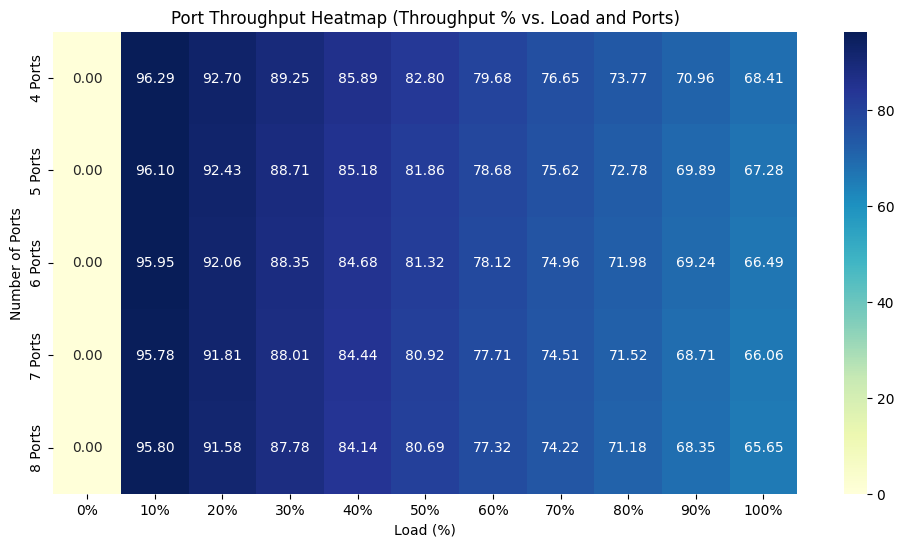

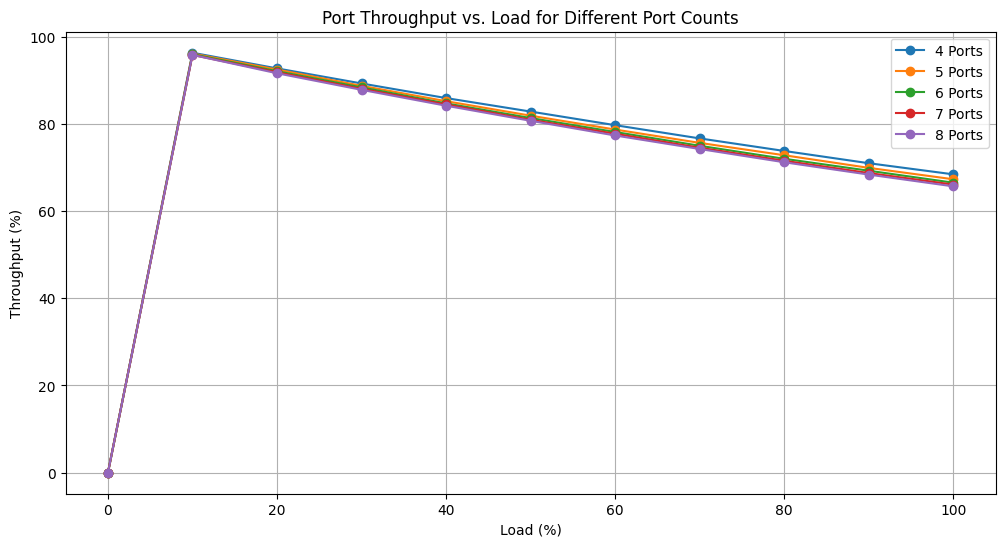

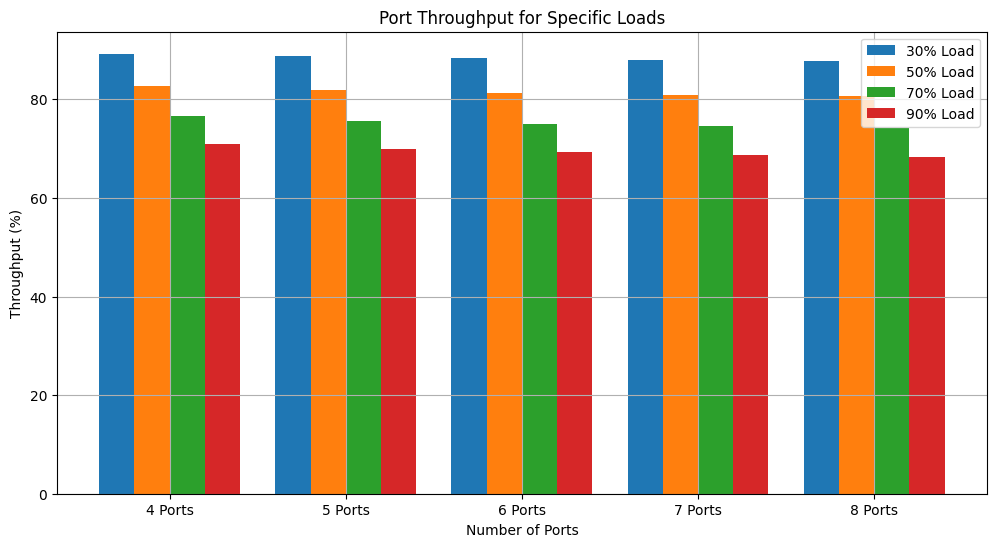

In [20]:
def main():
    # Store results for plotting
    results = np.zeros((len(port_range), len(load_range)))

    for i, ports in enumerate(port_range):
        for j, load in enumerate(load_range):
            throughput = simulate_switch(ports, load, test_no)
            results[i, j] = throughput
            print(f"Ports: {ports}, Load: {load}%, Throughput: {throughput:.2f}%")

    # Create heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        results,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        xticklabels=[f"{load}%" for load in load_range],
        yticklabels=[f"{ports} Ports" for ports in port_range],
    )
    plt.xlabel("Load (%)")
    plt.ylabel("Number of Ports")
    plt.title("Port Throughput Heatmap (Throughput % vs. Load and Ports)")
    plt.show()

    # Create line chart
    plt.figure(figsize=(12, 6))
    for i, ports in enumerate(port_range):
        plt.plot(load_range, results[i, :], marker='o', label=f"{ports} Ports")
    plt.xlabel("Load (%)")
    plt.ylabel("Throughput (%)")
    plt.title("Port Throughput vs. Load for Different Port Counts")
    plt.legend()
    plt.grid()
    plt.show()

    # Create bar chart for specific loads
    specific_loads = [30, 50, 70, 90]  # Example load levels to analyze
    plt.figure(figsize=(12, 6))
    bar_width = 0.2
    for k, load in enumerate(specific_loads):
        load_index = load_range.index(load)
        plt.bar(
            [p + k * bar_width for p in port_range],
            results[:, load_index],
            width=bar_width,
            label=f"{load}% Load",
        )
    plt.xlabel("Number of Ports")
    plt.ylabel("Throughput (%)")
    plt.title("Port Throughput for Specific Loads")
    plt.xticks([p + bar_width * 1.5 for p in port_range], [f"{p} Ports" for p in port_range])
    plt.legend()
    plt.grid()
    plt.show()



if __name__ == "__main__":
    main()